In [60]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# ANN & Experimentation
## Student Math Grade Prediction
## Importing Packages 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [62]:
data = pd.read_csv("student-mat.csv",sep = ";")
median = data['G3'].median()
data['G3'] = np.where(data['G3']>=median, 1, 0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0


In [63]:
data = data.drop(["G1","G2"], axis=1)
data = pd.get_dummies(data,drop_first = True)
train, test = train_test_split(data, test_size=0.3,random_state=23)
X_train=train.drop(['G3'], axis = 1)
y_train=train['G3']
X_test=test.drop(['G3'],axis = 1)
y_test=test['G3']
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)


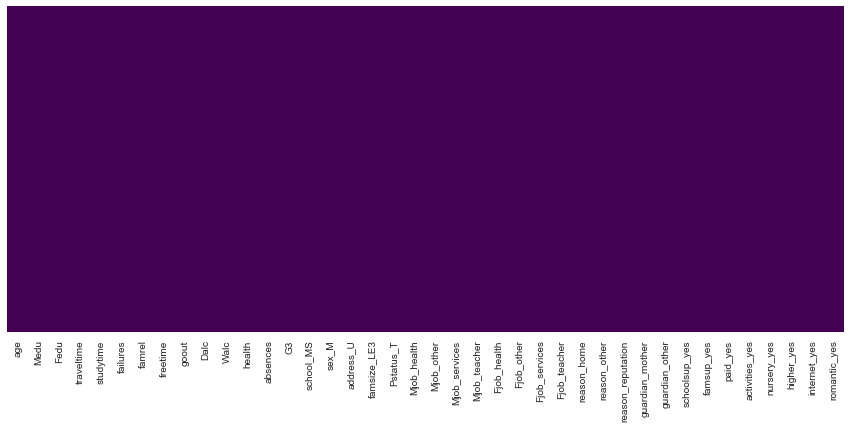

In [64]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:

data.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G3                   int64
school_MS            uint8
sex_M                uint8
address_U            uint8
famsize_LE3          uint8
Pstatus_T            uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_home          uint8
reason_other         uint8
reason_reputation    uint8
guardian_mother      uint8
guardian_other       uint8
schoolsup_yes        uint8
famsup_yes           uint8
paid_yes             uint8
activities_yes       uint8
nursery_yes          uint8
h

In [65]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)

In [66]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 39))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

Epoch 1/20
193/193 [==============================] - 8s 41ms/step - loss: 0.6930 - acc: 0.5440
Epoch 2/20
193/193 [==============================] - 0s 680us/step - loss: 0.6917 - acc: 0.5181
Epoch 3/20
193/193 [==============================] - 0s 635us/step - loss: 0.6876 - acc: 0.6839
Epoch 4/20
193/193 [==============================] - 0s 477us/step - loss: 0.6757 - acc: 0.7979
Epoch 5/20
193/193 [==============================] - 0s 491us/step - loss: 0.6501 - acc: 0.8083
Epoch 6/20
193/193 [==============================] - 0s 559us/step - loss: 0.6019 - acc: 0.8290
Epoch 7/20
193/193 [==============================] - 0s 699us/step - loss: 0.5473 - acc: 0.8238
Epoch 8/20
193/193 [==============================] - 0s 834us/step - loss: 0.4859 - acc: 0.8290
Epoch 9/20
193/193 [==============================] - 0s 771us/step - loss: 0.4398 - acc: 0.8342
Epoch 10/20
193/193 [==============================] - 0s 782us/step - loss: 0.4054 - acc: 0.8342
Epoch 11/20
193/193 [=========

In [67]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [68]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 92.23%
Test accuracy = 63.87%


In [18]:
range(0,10)

range(0, 10)

### Experiment 1
#### Number of hidden layers in NN

In [71]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 39))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

Epoch 1/20
193/193 [==============================] - 8s 40ms/step - loss: 0.6910 - acc: 0.5855
Epoch 2/20
193/193 [==============================] - 0s 696us/step - loss: 0.6836 - acc: 0.7098
Epoch 3/20
193/193 [==============================] - 0s 669us/step - loss: 0.6727 - acc: 0.7306
Epoch 4/20
193/193 [==============================] - 0s 566us/step - loss: 0.6553 - acc: 0.7668
Epoch 5/20
193/193 [==============================] - 0s 600us/step - loss: 0.6316 - acc: 0.7720
Epoch 6/20
193/193 [==============================] - 0s 781us/step - loss: 0.6045 - acc: 0.7876
Epoch 7/20
193/193 [==============================] - 0s 786us/step - loss: 0.5747 - acc: 0.8031
Epoch 8/20
193/193 [==============================] - 0s 769us/step - loss: 0.5475 - acc: 0.8083
Epoch 9/20
193/193 [==============================] - 0s 813us/step - loss: 0.5207 - acc: 0.8031
Epoch 10/20
193/193 [==============================] - 0s 791us/step - loss: 0.4972 - acc: 0.8083
Epoch 11/20
193/193 [=========

193/193 [==============================] - 0s 940us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 720us/step - loss: 0.6918 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 707us/step - loss: 0.6751 - acc: 0.5233
Epoch 9/20
193/193 [==============================] - 0s 687us/step - loss: 0.6025 - acc: 0.7720
Epoch 10/20
193/193 [==============================] - 0s 681us/step - loss: 0.5291 - acc: 0.8135
Epoch 11/20
193/193 [==============================] - 0s 693us/step - loss: 0.4712 - acc: 0.8601
Epoch 12/20
193/193 [==============================] - 0s 686us/step - loss: 0.3989 - acc: 0.9119
Epoch 13/20
193/193 [==============================] - 0s 649us/step - loss: 0.3339 - acc: 0.9119
Epoch 14/20
193/193 [==============================] - 0s 658us/step - loss: 0.2788 - acc: 0.9223
Epoch 15/20
193/193 [=================

In [72]:
accuracy_validation

[65.06, 60.24, 61.45, 65.06, 63.86, 48.19, 48.19, 48.19, 48.19, 48.19]

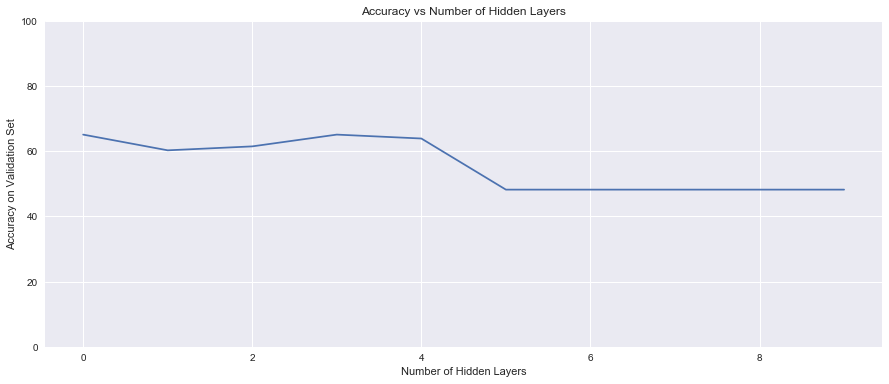

In [73]:

plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

As we see, Number of Hidden layers decrease accuracy on adding 1st  layer
we will keep only 0
hidden layer in the NN
#### Experiment 2
No of Nodes in Hidden Layer

In [74]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(10,20):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 39))
    

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/20
193/193 [==============================] - 9s 45ms/step - loss: 0.6923 - acc: 0.5389
Epoch 2/20
193/193 [==============================] - 0s 597us/step - loss: 0.6892 - acc: 0.6373
Epoch 3/20
193/193 [==============================] - 0s 952us/step - loss: 0.6848 - acc: 0.7150
Epoch 4/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6765 - acc: 0.7617
Epoch 5/20
193/193 [==============================] - 0s 896us/step - loss: 0.6635 - acc: 0.7876
Epoch 6/20
193/193 [==============================] - 0s 914us/step - loss: 0.6450 - acc: 0.8031
Epoch 7/20
193/193 [==============================] - 0s 798us/step - loss: 0.6214 - acc: 0.8083
Epoch 8/20
193/193 [==============================] - 0s 865us/step - loss: 0.5952 - acc: 0.7979
Epoch 9/20
193/193 [==============================] - 0s 1ms/step - loss: 0.5698 - acc: 0.8031
Epoch 10/20
193/193 [==============================] - 0s 977us/step - loss: 0.5443 - acc: 0.7927
Epoch 11/20
193/193 [=============

193/193 [==============================] - 0s 733us/step - loss: 0.5459 - acc: 0.8238
Epoch 9/20
193/193 [==============================] - 0s 718us/step - loss: 0.5198 - acc: 0.8135
Epoch 10/20
193/193 [==============================] - 0s 988us/step - loss: 0.4960 - acc: 0.8187
Epoch 11/20
193/193 [==============================] - 0s 1ms/step - loss: 0.4721 - acc: 0.8290
Epoch 12/20
193/193 [==============================] - 0s 944us/step - loss: 0.4520 - acc: 0.8394
Epoch 13/20
193/193 [==============================] - 0s 858us/step - loss: 0.4359 - acc: 0.8394
Epoch 14/20
193/193 [==============================] - 0s 845us/step - loss: 0.4200 - acc: 0.8497
Epoch 15/20
193/193 [==============================] - 0s 788us/step - loss: 0.4068 - acc: 0.8446
Epoch 16/20
193/193 [==============================] - 0s 683us/step - loss: 0.3950 - acc: 0.8497
Epoch 17/20
193/193 [==============================] - 0s 675us/step - loss: 0.3846 - acc: 0.8446
Epoch 18/20
193/193 [==============

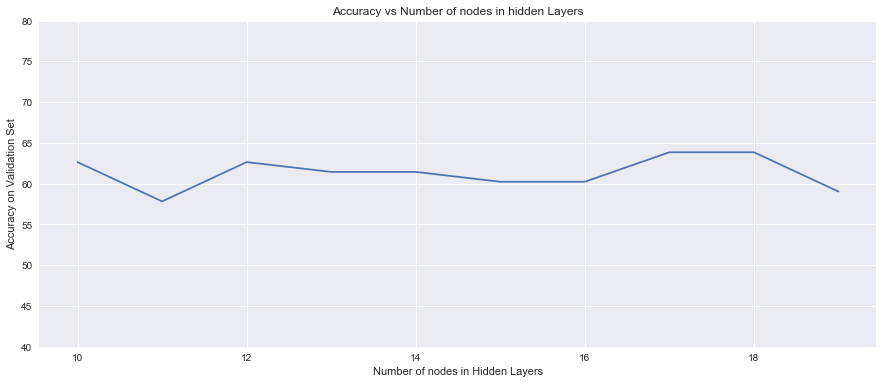

In [76]:
plt.ylim([40,80])
plt.plot(range(10,20),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

### no. of nodes = 17

In [77]:
accuracy_validation = [None]*3
count = 0
activationFunc = ['relu','sigmoid','tanh']
for activation_Func in range(len(activationFunc)):
    
    classifier = Sequential()

    classifier.add(Dense(output_dim = 17, init = 'uniform', activation = 'relu', input_dim = 39))
    
    
    
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = activationFunc[activation_Func]))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/20
193/193 [==============================] - 9s 46ms/step - loss: 4.1855 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 717us/step - loss: 2.0717 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 824us/step - loss: 1.5525 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 667us/step - loss: 1.4318 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 671us/step - loss: 1.3459 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 761us/step - loss: 1.2722 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 636us/step - loss: 1.2015 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 680us/step - loss: 1.1349 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 819us/step - loss: 1.0729 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 953us/step - loss: 1.0146 - acc: 0.5130
Epoch 11/20
193/193 [=========

According to the experimentation on validation set,
We will use sigmoid activation function for the Output Layer

## Experiment 4
Batch size for error back propagation

In [100]:
accuracy_validation = [None]*40
count = 0
for batchSize in range(5,45):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 17, init = 'uniform', activation = 'relu', input_dim = 39))
    
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 50)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/50
193/193 [==============================] - 11s 59ms/step - loss: 0.6898 - acc: 0.5803
Epoch 2/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6774 - acc: 0.6736
Epoch 3/50
193/193 [==============================] - 0s 2ms/step - loss: 0.6550 - acc: 0.6995
Epoch 4/50
193/193 [==============================] - 0s 2ms/step - loss: 0.6243 - acc: 0.7409
Epoch 5/50
193/193 [==============================] - 0s 1ms/step - loss: 0.5962 - acc: 0.7668
Epoch 6/50
193/193 [==============================] - 0s 1ms/step - loss: 0.5684 - acc: 0.7720
Epoch 7/50
193/193 [==============================] - 0s 1ms/step - loss: 0.5422 - acc: 0.7927
Epoch 8/50
193/193 [==============================] - 0s 2ms/step - loss: 0.5198 - acc: 0.8031
Epoch 9/50
193/193 [==============================] - 0s 2ms/step - loss: 0.4978 - acc: 0.8238
Epoch 10/50
193/193 [==============================] - 0s 2ms/step - loss: 0.4781 - acc: 0.8290
Epoch 11/50
193/193 [==========================

193/193 [==============================] - 0s 856us/step - loss: 0.3440 - acc: 0.8601
Epoch 21/50
193/193 [==============================] - 0s 819us/step - loss: 0.3365 - acc: 0.8653
Epoch 22/50
193/193 [==============================] - 0s 795us/step - loss: 0.3308 - acc: 0.8653
Epoch 23/50
193/193 [==============================] - 0s 815us/step - loss: 0.3232 - acc: 0.8756
Epoch 24/50
193/193 [==============================] - 0s 785us/step - loss: 0.3178 - acc: 0.8756
Epoch 25/50
193/193 [==============================] - 0s 852us/step - loss: 0.3107 - acc: 0.8860
Epoch 26/50
193/193 [==============================] - 0s 854us/step - loss: 0.3052 - acc: 0.8860
Epoch 27/50
193/193 [==============================] - 0s 826us/step - loss: 0.2983 - acc: 0.8912
Epoch 28/50
193/193 [==============================] - 0s 787us/step - loss: 0.2918 - acc: 0.8912
Epoch 29/50
193/193 [==============================] - 0s 803us/step - loss: 0.2868 - acc: 0.8912
Epoch 30/50
193/193 [===========

Epoch 4/50
193/193 [==============================] - 0s 763us/step - loss: 0.6642 - acc: 0.7720
Epoch 5/50
193/193 [==============================] - 0s 658us/step - loss: 0.6439 - acc: 0.7720
Epoch 6/50
193/193 [==============================] - 0s 683us/step - loss: 0.6185 - acc: 0.7824
Epoch 7/50
193/193 [==============================] - 0s 667us/step - loss: 0.5881 - acc: 0.7876
Epoch 8/50
193/193 [==============================] - 0s 636us/step - loss: 0.5573 - acc: 0.7824
Epoch 9/50
193/193 [==============================] - 0s 649us/step - loss: 0.5287 - acc: 0.7927
Epoch 10/50
193/193 [==============================] - 0s 710us/step - loss: 0.5026 - acc: 0.7927
Epoch 11/50
193/193 [==============================] - 0s 687us/step - loss: 0.4801 - acc: 0.7876
Epoch 12/50
193/193 [==============================] - 0s 699us/step - loss: 0.4583 - acc: 0.7979
Epoch 13/50
193/193 [==============================] - 0s 802us/step - loss: 0.4405 - acc: 0.8083
Epoch 14/50
193/193 [=====

193/193 [==============================] - 0s 616us/step - loss: 0.3892 - acc: 0.8394
Epoch 21/50
193/193 [==============================] - 0s 644us/step - loss: 0.3817 - acc: 0.8497
Epoch 22/50
193/193 [==============================] - 0s 655us/step - loss: 0.3728 - acc: 0.8497
Epoch 23/50
193/193 [==============================] - 0s 610us/step - loss: 0.3656 - acc: 0.8549
Epoch 24/50
193/193 [==============================] - 0s 595us/step - loss: 0.3583 - acc: 0.8601
Epoch 25/50
193/193 [==============================] - 0s 712us/step - loss: 0.3515 - acc: 0.8601
Epoch 26/50
193/193 [==============================] - 0s 676us/step - loss: 0.3447 - acc: 0.8601
Epoch 27/50
193/193 [==============================] - 0s 642us/step - loss: 0.3388 - acc: 0.8549
Epoch 28/50
193/193 [==============================] - 0s 719us/step - loss: 0.3327 - acc: 0.8549
Epoch 29/50
193/193 [==============================] - 0s 840us/step - loss: 0.3273 - acc: 0.8601
Epoch 30/50
193/193 [===========

193/193 [==============================] - 0s 456us/step - loss: 0.3367 - acc: 0.8601
Epoch 37/50
193/193 [==============================] - 0s 443us/step - loss: 0.3319 - acc: 0.8756
Epoch 38/50
193/193 [==============================] - 0s 449us/step - loss: 0.3271 - acc: 0.8808
Epoch 39/50
193/193 [==============================] - 0s 394us/step - loss: 0.3223 - acc: 0.8756
Epoch 40/50
193/193 [==============================] - 0s 513us/step - loss: 0.3175 - acc: 0.8808
Epoch 41/50
193/193 [==============================] - 0s 429us/step - loss: 0.3130 - acc: 0.8860
Epoch 42/50
193/193 [==============================] - 0s 420us/step - loss: 0.3089 - acc: 0.8860
Epoch 43/50
193/193 [==============================] - 0s 523us/step - loss: 0.3048 - acc: 0.8860
Epoch 44/50
193/193 [==============================] - 0s 410us/step - loss: 0.3014 - acc: 0.8860
Epoch 45/50
193/193 [==============================] - 0s 476us/step - loss: 0.2968 - acc: 0.8860
Epoch 46/50
193/193 [===========

193/193 [==============================] - 0s 295us/step - loss: 0.6888 - acc: 0.5855
Epoch 3/50
193/193 [==============================] - 0s 414us/step - loss: 0.6848 - acc: 0.6891
Epoch 4/50
193/193 [==============================] - ETA: 0s - loss: 0.6848 - acc: 0.500 - 0s 272us/step - loss: 0.6789 - acc: 0.7358
Epoch 5/50
193/193 [==============================] - 0s 336us/step - loss: 0.6707 - acc: 0.7824
Epoch 6/50
193/193 [==============================] - 0s 333us/step - loss: 0.6601 - acc: 0.7979
Epoch 7/50
193/193 [==============================] - 0s 337us/step - loss: 0.6470 - acc: 0.7927
Epoch 8/50
193/193 [==============================] - 0s 333us/step - loss: 0.6324 - acc: 0.7979
Epoch 9/50
193/193 [==============================] - 0s 381us/step - loss: 0.6146 - acc: 0.8135
Epoch 10/50
193/193 [==============================] - 0s 322us/step - loss: 0.5961 - acc: 0.8238
Epoch 11/50
193/193 [==============================] - 0s 372us/step - loss: 0.5780 - acc: 0.8187
E

193/193 [==============================] - 0s 440us/step - loss: 0.4833 - acc: 0.8031
Epoch 19/50
193/193 [==============================] - 0s 370us/step - loss: 0.4718 - acc: 0.8031
Epoch 20/50
193/193 [==============================] - 0s 458us/step - loss: 0.4597 - acc: 0.8031
Epoch 21/50
193/193 [==============================] - 0s 449us/step - loss: 0.4495 - acc: 0.8135
Epoch 22/50
193/193 [==============================] - 0s 436us/step - loss: 0.4400 - acc: 0.8187
Epoch 23/50
193/193 [==============================] - 0s 434us/step - loss: 0.4307 - acc: 0.8238
Epoch 24/50
193/193 [==============================] - 0s 488us/step - loss: 0.4220 - acc: 0.8342
Epoch 25/50
193/193 [==============================] - 0s 430us/step - loss: 0.4142 - acc: 0.8394
Epoch 26/50
193/193 [==============================] - 0s 312us/step - loss: 0.4066 - acc: 0.8446
Epoch 27/50
193/193 [==============================] - 0s 373us/step - loss: 0.3995 - acc: 0.8446
Epoch 28/50
193/193 [===========

193/193 [==============================] - 0s 405us/step - loss: 0.3812 - acc: 0.8497
Epoch 35/50
193/193 [==============================] - 0s 331us/step - loss: 0.3758 - acc: 0.8497
Epoch 36/50
193/193 [==============================] - 0s 364us/step - loss: 0.3707 - acc: 0.8497
Epoch 37/50
193/193 [==============================] - 0s 387us/step - loss: 0.3658 - acc: 0.8446
Epoch 38/50
193/193 [==============================] - 0s 345us/step - loss: 0.3611 - acc: 0.8497
Epoch 39/50
193/193 [==============================] - 0s 380us/step - loss: 0.3572 - acc: 0.8549
Epoch 40/50
193/193 [==============================] - 0s 289us/step - loss: 0.3523 - acc: 0.8601
Epoch 41/50
193/193 [==============================] - 0s 339us/step - loss: 0.3482 - acc: 0.8653
Epoch 42/50
193/193 [==============================] - 0s 394us/step - loss: 0.3441 - acc: 0.8653
Epoch 43/50
193/193 [==============================] - 0s 318us/step - loss: 0.3400 - acc: 0.8705
Epoch 44/50
193/193 [===========

193/193 [==============================] - 0s 257us/step - loss: 0.3094 - acc: 0.8860
Epoch 1/50
193/193 [==============================] - 12s 60ms/step - loss: 0.6923 - acc: 0.5285
Epoch 2/50
193/193 [==============================] - 0s 304us/step - loss: 0.6897 - acc: 0.6477
Epoch 3/50
193/193 [==============================] - 0s 274us/step - loss: 0.6869 - acc: 0.7202
Epoch 4/50
193/193 [==============================] - 0s 233us/step - loss: 0.6837 - acc: 0.7409
Epoch 5/50
193/193 [==============================] - 0s 286us/step - loss: 0.6794 - acc: 0.7668
Epoch 6/50
193/193 [==============================] - 0s 343us/step - loss: 0.6742 - acc: 0.7876
Epoch 7/50
193/193 [==============================] - 0s 370us/step - loss: 0.6673 - acc: 0.7824
Epoch 8/50
193/193 [==============================] - 0s 300us/step - loss: 0.6586 - acc: 0.8031
Epoch 9/50
193/193 [==============================] - 0s 535us/step - loss: 0.6484 - acc: 0.8031
Epoch 10/50
193/193 [====================

193/193 [==============================] - 0s 262us/step - loss: 0.5674 - acc: 0.7876
Epoch 17/50
193/193 [==============================] - 0s 248us/step - loss: 0.5533 - acc: 0.7927
Epoch 18/50
193/193 [==============================] - 0s 218us/step - loss: 0.5405 - acc: 0.7927
Epoch 19/50
193/193 [==============================] - 0s 261us/step - loss: 0.5272 - acc: 0.7927
Epoch 20/50
193/193 [==============================] - 0s 223us/step - loss: 0.5148 - acc: 0.8031
Epoch 21/50
193/193 [==============================] - 0s 234us/step - loss: 0.5031 - acc: 0.8031
Epoch 22/50
193/193 [==============================] - 0s 168us/step - loss: 0.4915 - acc: 0.8031
Epoch 23/50
193/193 [==============================] - 0s 277us/step - loss: 0.4809 - acc: 0.8135
Epoch 24/50
193/193 [==============================] - 0s 235us/step - loss: 0.4708 - acc: 0.8135
Epoch 25/50
193/193 [==============================] - 0s 212us/step - loss: 0.4618 - acc: 0.8187
Epoch 26/50
193/193 [===========

193/193 [==============================] - 0s 370us/step - loss: 0.4193 - acc: 0.8446
Epoch 33/50
193/193 [==============================] - 0s 311us/step - loss: 0.4131 - acc: 0.8549
Epoch 34/50
193/193 [==============================] - 0s 268us/step - loss: 0.4074 - acc: 0.8549
Epoch 35/50
193/193 [==============================] - 0s 407us/step - loss: 0.4023 - acc: 0.8549
Epoch 36/50
193/193 [==============================] - 0s 284us/step - loss: 0.3972 - acc: 0.8549
Epoch 37/50
193/193 [==============================] - 0s 276us/step - loss: 0.3924 - acc: 0.8601
Epoch 38/50
193/193 [==============================] - 0s 316us/step - loss: 0.3876 - acc: 0.8601
Epoch 39/50
193/193 [==============================] - 0s 342us/step - loss: 0.3832 - acc: 0.8601
Epoch 40/50
193/193 [==============================] - 0s 296us/step - loss: 0.3793 - acc: 0.8549
Epoch 41/50
193/193 [==============================] - 0s 379us/step - loss: 0.3750 - acc: 0.8601
Epoch 42/50
193/193 [===========

193/193 [==============================] - 0s 238us/step - loss: 0.3574 - acc: 0.8446
Epoch 49/50
193/193 [==============================] - 0s 265us/step - loss: 0.3536 - acc: 0.8446
Epoch 50/50
193/193 [==============================] - 0s 282us/step - loss: 0.3501 - acc: 0.8446
Epoch 1/50
193/193 [==============================] - 12s 62ms/step - loss: 0.6941 - acc: 0.4352
Epoch 2/50
193/193 [==============================] - 0s 330us/step - loss: 0.6918 - acc: 0.5803
Epoch 3/50
193/193 [==============================] - 0s 323us/step - loss: 0.6897 - acc: 0.6477
Epoch 4/50
193/193 [==============================] - 0s 279us/step - loss: 0.6875 - acc: 0.7047
Epoch 5/50
193/193 [==============================] - 0s 361us/step - loss: 0.6848 - acc: 0.7306
Epoch 6/50
193/193 [==============================] - 0s 180us/step - loss: 0.6818 - acc: 0.7409
Epoch 7/50
193/193 [==============================] - 0s 260us/step - loss: 0.6778 - acc: 0.7565
Epoch 8/50
193/193 [===================

193/193 [==============================] - 0s 269us/step - loss: 0.6214 - acc: 0.7824
Epoch 15/50
193/193 [==============================] - 0s 272us/step - loss: 0.6103 - acc: 0.7876
Epoch 16/50
193/193 [==============================] - 0s 257us/step - loss: 0.5984 - acc: 0.8031
Epoch 17/50
193/193 [==============================] - 0s 320us/step - loss: 0.5871 - acc: 0.8031
Epoch 18/50
193/193 [==============================] - 0s 295us/step - loss: 0.5757 - acc: 0.8031
Epoch 19/50
193/193 [==============================] - 0s 243us/step - loss: 0.5635 - acc: 0.7927
Epoch 20/50
193/193 [==============================] - 0s 329us/step - loss: 0.5524 - acc: 0.7876
Epoch 21/50
193/193 [==============================] - 0s 256us/step - loss: 0.5415 - acc: 0.7927
Epoch 22/50
193/193 [==============================] - 0s 229us/step - loss: 0.5305 - acc: 0.7979
Epoch 23/50
193/193 [==============================] - 0s 231us/step - loss: 0.5198 - acc: 0.7927
Epoch 24/50
193/193 [===========

In [101]:
accuracy_validation

[62.65,
 60.24,
 66.27,
 63.86,
 63.86,
 66.27,
 62.65,
 63.86,
 63.86,
 60.24,
 59.04,
 59.04,
 62.65,
 63.86,
 59.04,
 62.65,
 61.45,
 62.65,
 63.86,
 61.45,
 63.86,
 61.45,
 60.24,
 61.45,
 60.24,
 62.65,
 59.04,
 61.45,
 59.04,
 60.24,
 63.86,
 61.45,
 60.24,
 59.04,
 60.24,
 62.65,
 59.04,
 57.83,
 57.83,
 59.04]

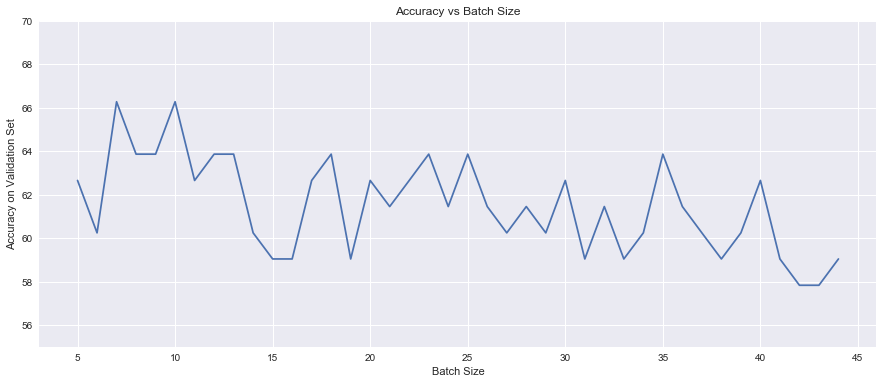

In [103]:
plt.ylim([55,70])
plt.plot(range(5,45),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

I will stick with Batch size = 7
#### Final NN after doing Hyper parameter tuning

In [177]:

accuracy_test = [None]*10
count = 0
for nb_epoch in range(28,38):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 17, init = 'uniform', activation = 'relu', input_dim = 39))
    
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 7, nb_epoch = nb_epoch)
    accuracy_test[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1# Adding the input layer and the first hidden layer


Epoch 1/28
193/193 [==============================] - 35s 183ms/step - loss: 0.6928 - acc: 0.5440
Epoch 2/28
193/193 [==============================] - 0s 2ms/step - loss: 0.6845 - acc: 0.7772
Epoch 3/28
193/193 [==============================] - 0s 2ms/step - loss: 0.6699 - acc: 0.7772
Epoch 4/28
193/193 [==============================] - 0s 2ms/step - loss: 0.6447 - acc: 0.7824
Epoch 5/28
193/193 [==============================] - 0s 2ms/step - loss: 0.6123 - acc: 0.7927
Epoch 6/28
193/193 [==============================] - 0s 2ms/step - loss: 0.5746 - acc: 0.8031
Epoch 7/28
193/193 [==============================] - 0s 2ms/step - loss: 0.5387 - acc: 0.8031
Epoch 8/28
193/193 [==============================] - 0s 2ms/step - loss: 0.5064 - acc: 0.7979
Epoch 9/28
193/193 [==============================] - 0s 2ms/step - loss: 0.4792 - acc: 0.7979
Epoch 10/28
193/193 [==============================] - 0s 2ms/step - loss: 0.4567 - acc: 0.8083
Epoch 11/28
193/193 [=========================

193/193 [==============================] - 0s 2ms/step - loss: 0.3269 - acc: 0.8808
Epoch 22/33
193/193 [==============================] - 0s 2ms/step - loss: 0.3196 - acc: 0.8808
Epoch 23/33
193/193 [==============================] - 0s 2ms/step - loss: 0.3122 - acc: 0.8860
Epoch 24/33
193/193 [==============================] - 0s 2ms/step - loss: 0.3048 - acc: 0.8860
Epoch 25/33
193/193 [==============================] - 0s 2ms/step - loss: 0.2978 - acc: 0.8964
Epoch 26/33
193/193 [==============================] - 0s 1ms/step - loss: 0.2911 - acc: 0.8964
Epoch 27/33
193/193 [==============================] - 0s 2ms/step - loss: 0.2862 - acc: 0.9016
Epoch 28/33
193/193 [==============================] - 0s 1ms/step - loss: 0.2795 - acc: 0.9016
Epoch 29/33
193/193 [==============================] - 0s 2ms/step - loss: 0.2733 - acc: 0.9067
Epoch 30/33
193/193 [==============================] - 0s 2ms/step - loss: 0.2662 - acc: 0.9016
Epoch 31/33
193/193 [==============================]

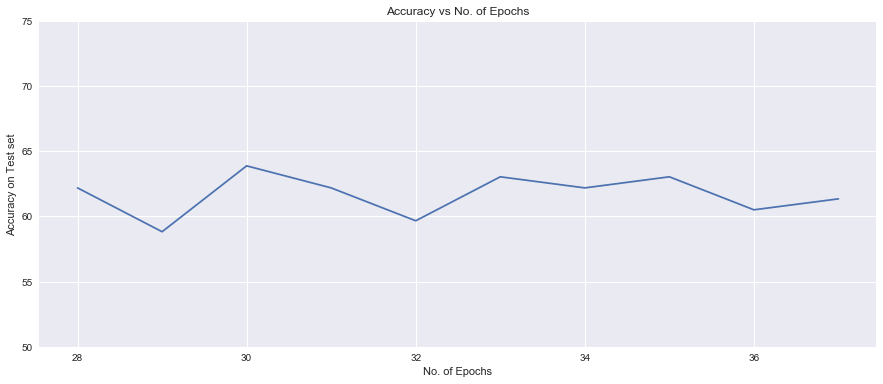

In [178]:
plt.ylim([50,75])
plt.plot(range(28,38),accuracy_test)
plt.title("Accuracy vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy on Test set")

In [186]:
accuracy_test

[62.18, 58.82, 63.87, 62.18, 59.66, 63.03, 62.18, 63.03, 60.5, 61.34]

In [188]:
max(accuracy_test)

63.87

In [198]:
print('Test accuracy at epoch 30 batch size=7, zero hidden layers, no. of nodes=17 and sigoid activation function is ',max(accuracy_test),'%')   

Test accuracy at epoch 30 batch size=7, zero hidden layers, no. of nodes=17 and sigoid activation function is  63.87 %
